In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
#from matplotlib import pyplot as plt

# Set the figure size - handy for larger output
# plt.rcParams["figure.figsize"] = [10, 8]
# Set up with a higher resolution screen (useful on Mac)
#%config InlineBackend.figure_format = 'retina'

In [8]:
# define file names
raw_file="Sequence_quality/multiqc_out/raw_multiqc_general_stats.txt"
#qcd_file="Sequence_quality/multiqc_data_qc/multiqc_general_stats.txt"
decontaminated = "Sequence_quality/multiqc_out/decontaminated_multiqc_general_stats.txt"
raw_overrepresented="raw_overrepresented.tsv"

In [9]:
# read from txt files
raw_df = pd.read_csv(raw_file, delimiter = "\t")
#qcd_df = pd.read_csv(qcd_file, delimiter = "\t")
reads_df = pd.read_csv(decontaminated, delimiter = "\t")

In [18]:
reads_df.head()

,Sample,FastQC_mqc-generalstats-fastqc-percent_duplicates,FastQC_mqc-generalstats-fastqc-percent_gc,FastQC_mqc-generalstats-fastqc-avg_sequence_length,FastQC_mqc-generalstats-fastqc-percent_fails,FastQC_mqc-generalstats-fastqc-total_sequences
0,house_1_raw_R1,62.432332,55.0,148.192111,33.333333,34364929.0
1,house_1_raw_R2,62.594877,55.0,147.553875,33.333333,34364929.0
2,house_1_treat_R1,7.379269,53.0,148.126779,25.000000,32050785.0
3,house_1_treat_R2,7.503715,53.0,147.293587,25.000000,32050785.0
4,house_2_raw_R1,14.274774,48.0,148.322914,25.000000,33641442.0


In [24]:
raw_df = raw_df.sort_values(by='Sample')
raw_df.iloc[2:23].head()

,Sample,FastQC_mqc-generalstats-fastqc-percent_duplicates,FastQC_mqc-generalstats-fastqc-percent_gc,FastQC_mqc-generalstats-fastqc-avg_sequence_length,FastQC_mqc-generalstats-fastqc-percent_fails,FastQC_mqc-generalstats-fastqc-total_sequences
2,house_1_raw_R1,63.287655,56.0,150.0,33.333333,41542263.0
3,house_1_raw_R2,62.350857,55.0,150.0,33.333333,41542263.0
4,house_1_treat_R1,8.053038,53.0,150.0,25.000000,39393230.0
5,house_1_treat_R2,7.981568,53.0,150.0,25.000000,39393230.0
6,house_2_raw_R1,15.142536,48.0,150.0,25.000000,40411838.0


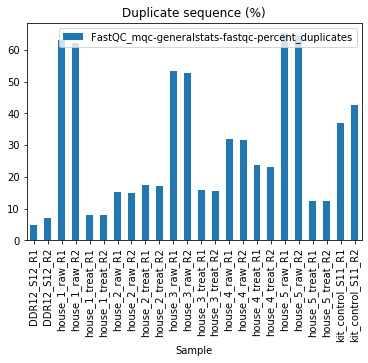

In [13]:
# Make stacked bar plot (absolute and percentage) for duplicate and unique sequences

raw_df.plot(x='Sample', y='FastQC_mqc-generalstats-fastqc-percent_duplicates', kind='bar',
        title='Duplicate sequence (%)')

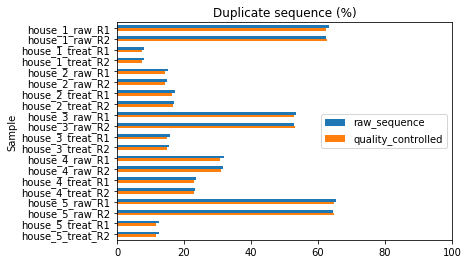

In [27]:
# make new dataframe from existing dataframe:
dup_df=pd.DataFrame({'raw_sequence': list(raw_df.iloc[2:22]['FastQC_mqc-generalstats-fastqc-percent_duplicates']), 
                     'quality_controlled': list(reads_df['FastQC_mqc-generalstats-fastqc-percent_duplicates'])}, 
                    index=reads_df['Sample'])
ax=dup_df.plot(y=['raw_sequence','quality_controlled'], kind='barh',
        title='Duplicate sequence (%)')
ax.invert_yaxis()
ax.set_xlim([0,100])
plt.savefig('Sequence_quality/figures/Percent_Duplicate.pdf',bbox_inches='tight')

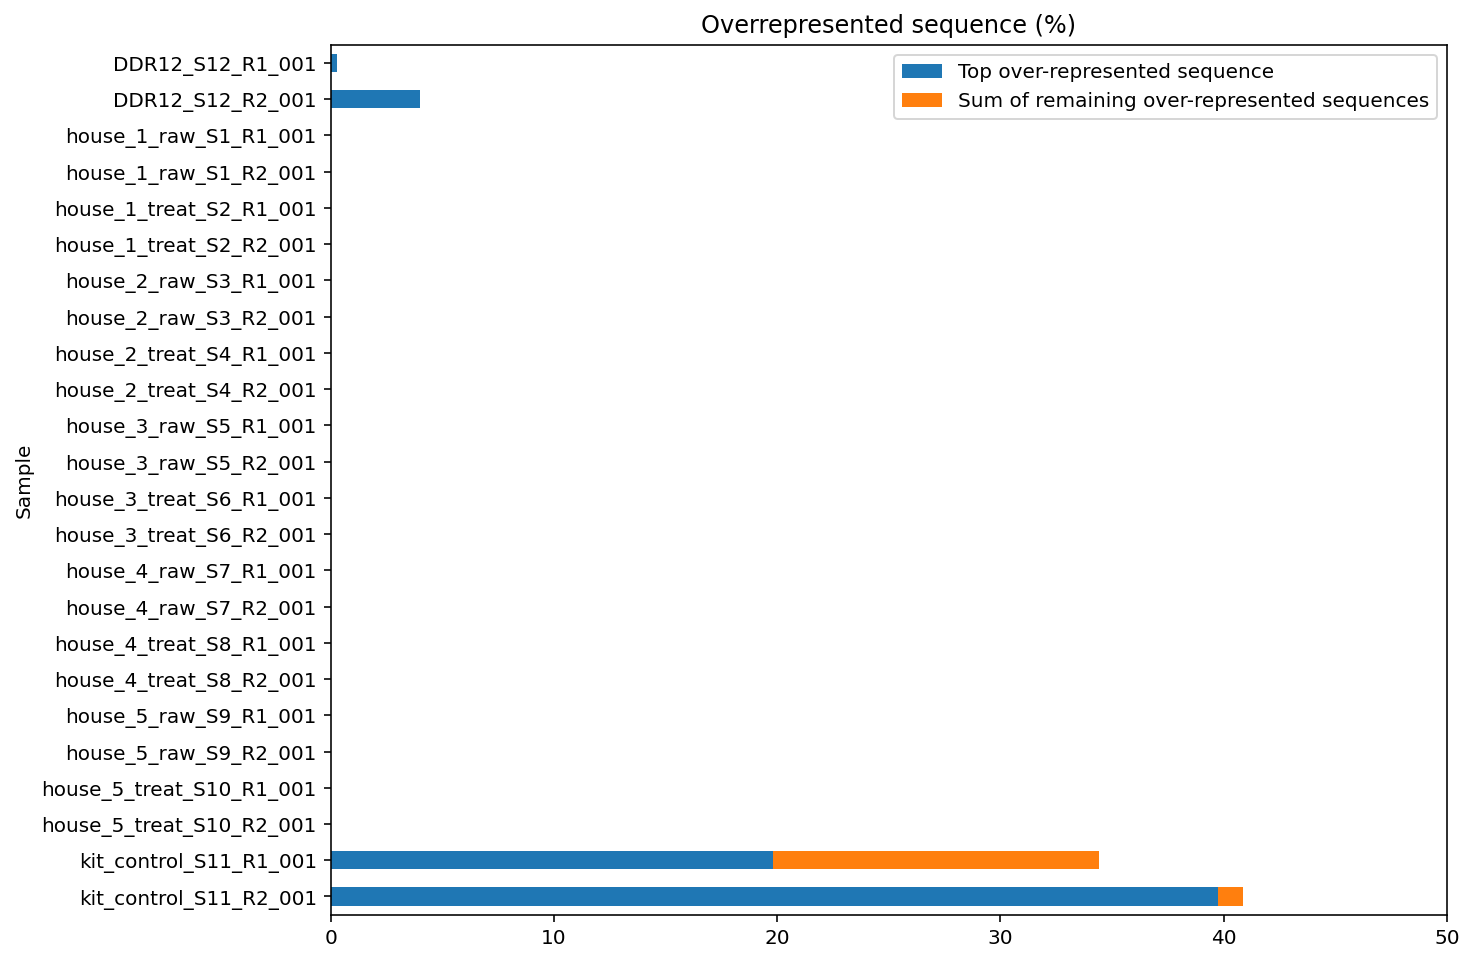

In [76]:
# over represented sequence
# read data from tsv
ro_df = pd.read_csv(raw_overrepresented, delimiter = "\t")
# bar plot
roplot_df=pd.DataFrame({'Top over-represented sequence':list(ro_df['Top over-represented sequence']), 
                        'Sum of remaining over-represented sequences':list(ro_df['Sum of remaining over-represented sequences'])},
                        index=ro_df['Category'])
ax1=roplot_df.plot(y=['Top over-represented sequence','Sum of remaining over-represented sequences'], kind='barh', 
               title='Overrepresented sequence (%)'
                  ,stacked=True
                  ,xlabel='Sample')
ax1.invert_yaxis()
ax1.set_xlim([0,50])
plt.savefig('figures/Percent_Overrepresented.pdf',bbox_inches='tight')
# After kneaddata quality control, all samples have < 1% overrepresented sequences. 

In [35]:
seq_number = list(reads_df['FastQC_mqc-generalstats-fastqc-total_sequences'].unique())

## Nonpareil ouput

In [33]:
nonpareil_df = pd.read_csv("Sequence_quality/R-nonpareil-out-decontaminated.csv", index_col = 0)
nonpareil_df.head()

,kappa,C,LR,modelR,LRstar,diversity,Site,Treatment
Sample,,,,,,,,
house_1_raw,0.96221,0.965399,5092607410,0.997355,1.412810e+08,16.383982,House_1,Raw
house_1_treat,0.54146,0.570752,4747586482,0.998040,2.530740e+11,21.359158,House_1,Treated
house_2_raw,0.77843,0.795356,4989799453,0.998709,3.013058e+10,19.735119,House_2,Raw
house_2_treat,0.66024,0.684204,5701811367,0.995457,2.218280e+11,20.194536,House_2,Treated
house_3_raw,0.93767,0.942867,4114198647,0.992217,6.863332e+08,16.536484,House_3,Raw


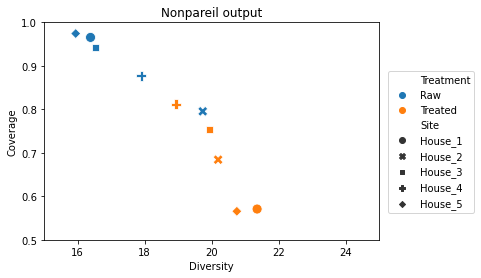

In [10]:
ax2 = sns.scatterplot(x="diversity", y="C", 
                data=nonpareil_df, hue = "Treatment", style = "Site", s = 100)
ax2.legend(bbox_to_anchor=(1.3, 0.8))
plt.title("Nonpareil output")
plt.ylabel("Coverage")
plt.xlabel("Diversity")
plt.xlim([15,25])
plt.ylim([0.5,1])
plt.savefig('Sequence_quality/figures/Nonpareil_decontaminated.pdf',bbox_inches='tight')

In [37]:
quality_df = pd.DataFrame()
quality_df[['Diversity', 'Coverage']] = nonpareil_df[['diversity', 'C']]
quality_df['Sequence number'] = seq_number
quality_df

,Diversity,Coverage,Sequence number
Sample,,,
house_1_raw,16.383982,0.965399,34364929.0
house_1_treat,21.359158,0.570752,32050785.0
house_2_raw,19.735119,0.795356,33641442.0
house_2_treat,20.194536,0.684204,38434083.0
house_3_raw,16.536484,0.942867,27736047.0
house_3_treat,19.931058,0.754478,28408621.0
house_4_raw,17.899055,0.877275,23416543.0
house_4_treat,18.932677,0.811760,30347847.0
house_5_raw,15.941502,0.974273,26152913.0


### Correlation between Sequence number and diversity or coverage

In [41]:
print(pearsonr(quality_df['Sequence number'], quality_df['Diversity']))
print(pearsonr(quality_df['Sequence number'], quality_df['Coverage']))

(0.12426884132112066, 0.7323210824138051)
(-0.000360096307640112, 0.9992122894291796)
